# German credit data

신용평가모델:
- 대출 신청자 1000명의 샘플 데이터 => 실제 대출 승인여부 (good, bad)

분석의 목적:
- 고객 데이터를 기반으로 => 이 사람의 대출 승인 여부를 판단하는 로직(기준)을 좀 알려줘.

종속변수(우리가 알고 싶은 결과):
- Risk(good, bad)

가설:
- 각각의 컬럼들이 -> Risk에 미치는 영향을 파악하면 -> 피처 엔지니어링에 활용 -> 모델링에 활용

EDA :
- 데이터를 보면서 종속 변수에 영향을 미치는 중요한 컬럼들을 발견하기 위해

- (1) 저축계좌(적금계좌) / 예금계좌가 없거나 적은 사람은 신용에 문제가 있을 가능성이 높다.
- (2) 대출목적 (TV) 신용에 문제가 있을 것이다.

## 1. 데이터 탐색 (Exploratory Data Analysis, EDA)

먼저 데이터의 구조를 파악하고 변수별로 어떤 특성이 있는지 확인하는 단계입니다.

## 1.1 데이터 로드 및 기본 정보 확인

- 데이터 셋을 로드한 후, 데이터의 기본적인 정보(열 이름, 데이터 타입, 결측치 유무 등)를 확인합니다.
- 데이터 분포, 평균, 중간값, 표준편차 등의 기본 통계량을 요약합니다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('german_credit.csv', index_col=False)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


- Age: 나이
- Sex: 성별
- Job: 직업 (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing: 거주 형태(자가, 임대, 무상거주)
- Saving accounts: 저축 계좌 잔고
- Checking account: 입출금 계좌 잔고
- Credit amount: 대출 금액
- Duration: 대출 기간
- Purpose: 대출 목적
- Risk: 대출 위험도(상환 불이행 가능성)
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)

In [4]:
# Unnamed: 0 컬럼 제거
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


- 데이터셋: 1000개의 행과 10개의 열이 있습니다.

In [13]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [8]:
df.corr(numeric_only=True) # 상관관계

# 공장데이터 분석
# 제품에 영향을 주는 요소 컬럼이 30개가 넘어요. (소음크기(데시벨), 온도, 작업장온도, )
# -> 이걸 계산하고 제품에 영향을 주는 요소를 찾는 게 일.

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [10]:
# 컬럼에서의 유니크한 값들
df.nunique() # 각 컬럼의 유니크한 갯수를 반환

,0
Age,53
Sex,2
Job,4
Housing,3
Saving accounts,4
Checking account,3
Credit amount,921
Duration,33
Purpose,8
Risk,2


In [14]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


- 통계 요약: 나이, 신용 금액, 대출 기간 등의 평균과 중앙값을 통해 데이터의 분포를 대략적으로 파악

### 1.2 결측치 및 이상치 확인

- 결측치가 있는지 확인하고 필요한 경우 결측치를 처리합니다.
- 숫자형 변수에 대해 이상치를 시각화하여 확인하고 처리합니다.

In [15]:
df.isna().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [ ]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

missing_value_table(df)

,Missing Values,% Value
Checking account,394,39
Saving accounts,183,18
Age,0,0
Sex,0,0
Job,0,0
Housing,0,0
Credit amount,0,0
Duration,0,0
Purpose,0,0
Risk,0,0


### 1.3 범주형 변수의 분포 확인

- 범주형 변수(Sex, Housing, Saving accounts, Purpose 등)의 고유값과 분포를 확인합니다.
- 범주형 변수 간의 상관관계를 확인하고 중요한 상관관계가 있다면 이후 분석에 참고합니다.

In [ ]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
df['Saving accounts'].value_counts(dropna=False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
df.groupby(['Sex', 'Checking account']).size() # unstack: index값을 컬럼으로.

Sex     Checking account
female  little               88
        moderate             86
        rich                 20
male    little              186
        moderate            183
        rich                 43
dtype: int64

In [ ]:
df.groupby(['Sex', 'Checking account']).size().unstack() # unstack: index값을 컬럼으로.

Checking account,little,moderate,rich
Sex,,,
female,88,86,20
male,186,183,43


/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

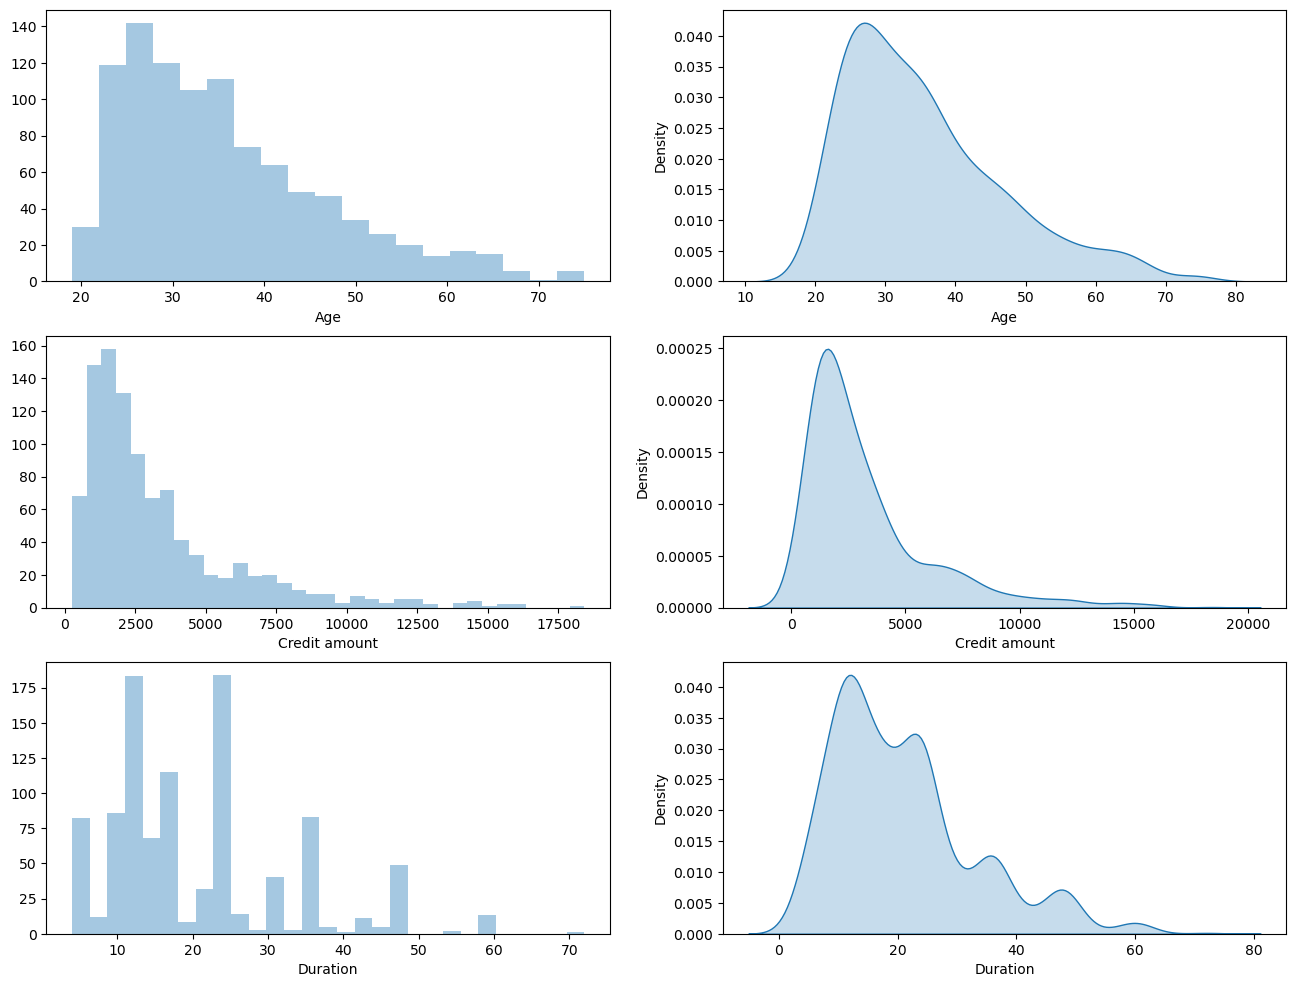

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,12))
category = ["Age", "Credit amount", "Duration"]

count = 0
for i in range(3):
    sns.distplot(df[category[count]], ax=ax[i][0], kde=False)
    sns.kdeplot(df[category[count]], ax=ax[i][1], shade=True)
    count += 1

In [ ]:
new_df = df[['Duration', 'Credit amount', 'Age']]
new_df.corr()

,Duration,Credit amount,Age
Duration,1.000000,0.624984,-0.036136
Credit amount,0.624984,1.000000,0.032716
Age,-0.036136,0.032716,1.000000


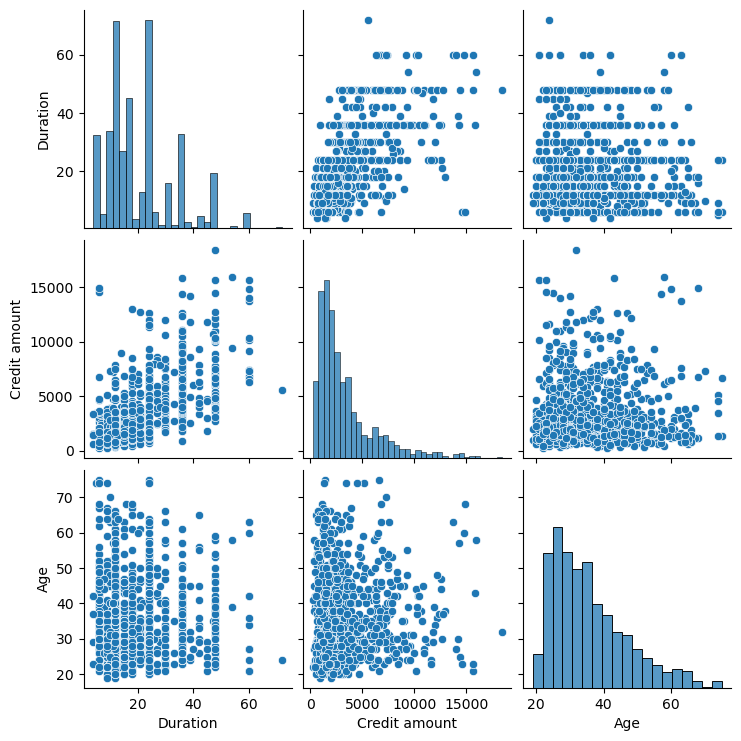

In [ ]:
sns.pairplot(new_df)

<AxesSubplot:>

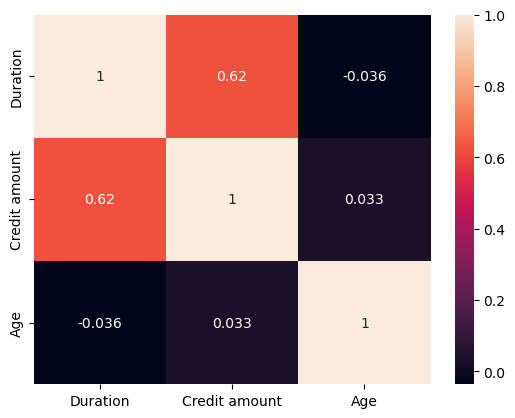

In [ ]:
sns.heatmap(new_df.corr(), annot=True)

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

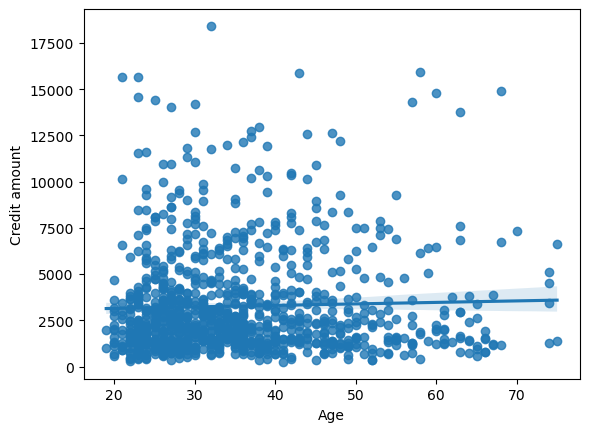

In [ ]:
sns.regplot(x='Age', y='Credit amount', data=new_df)

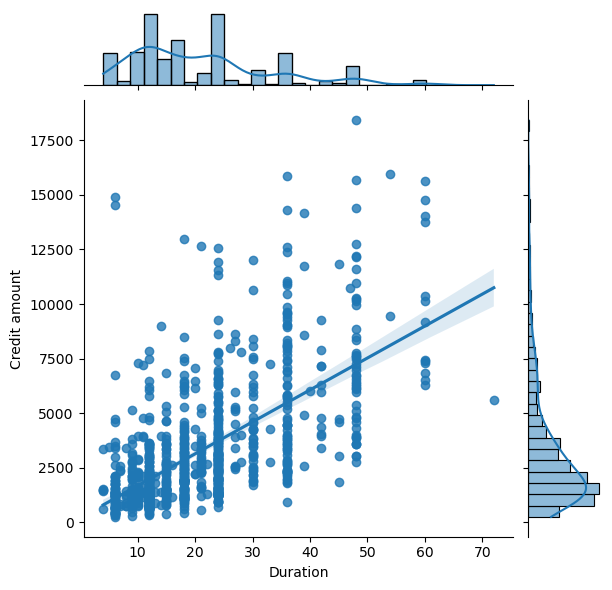

In [ ]:
sns.jointplot(x='Duration', y='Credit amount', data=new_df, kind='reg')

In [36]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

<ipython-input-36-d48af0d361ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(box.get_xticklabels(), rotation=r)


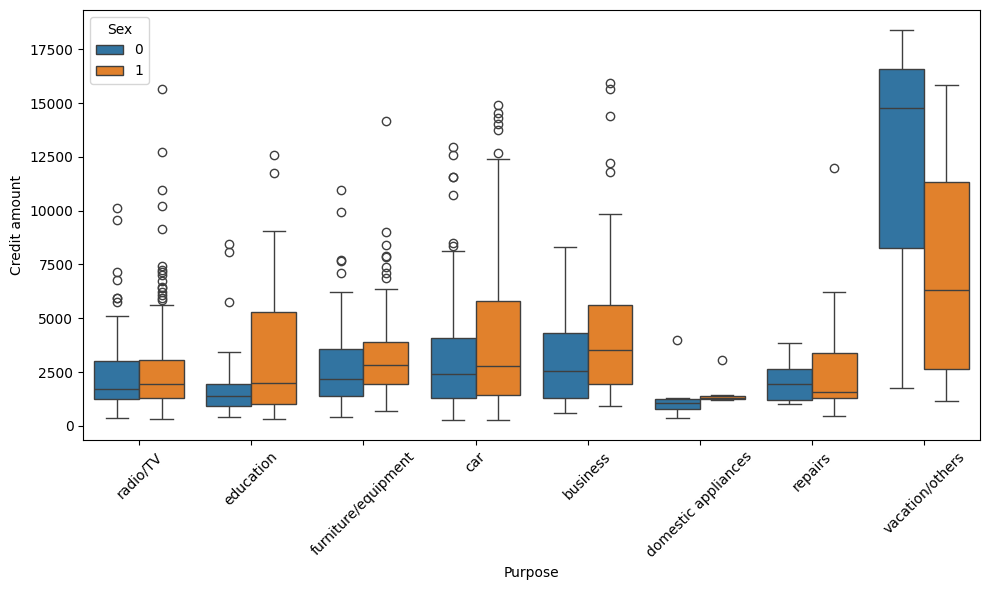

In [37]:
boxes("Purpose","Credit amount","Sex")

<ipython-input-36-d48af0d361ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(box.get_xticklabels(), rotation=r)


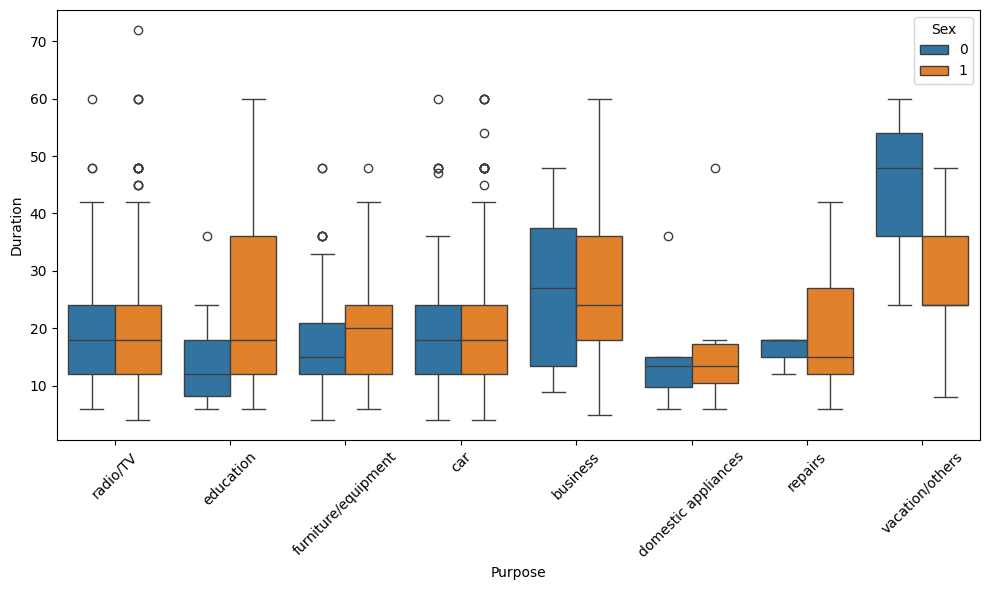

In [38]:
boxes("Purpose","Duration","Sex")

<ipython-input-36-d48af0d361ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(box.get_xticklabels(), rotation=r)


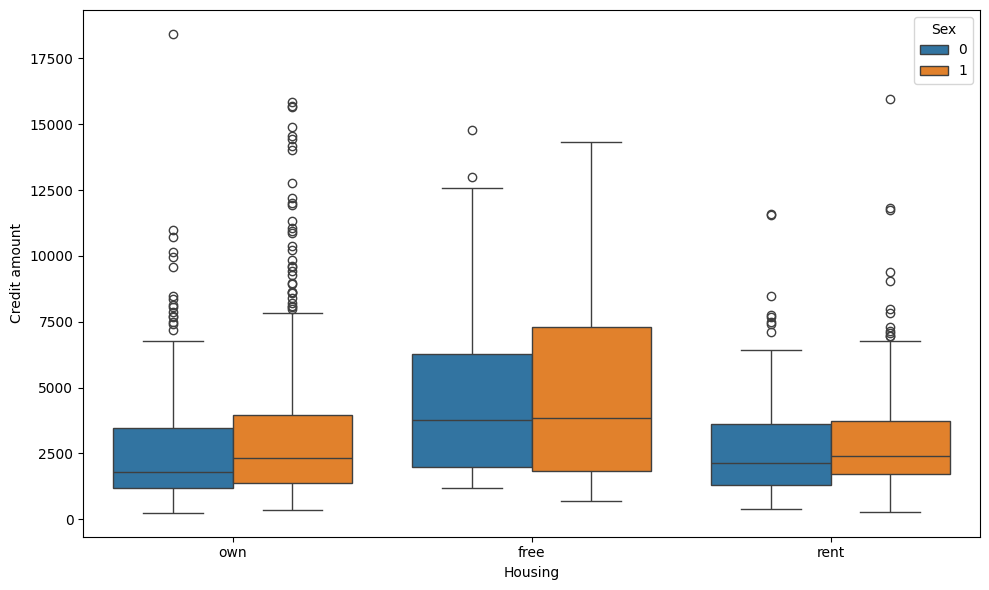

In [39]:
boxes("Housing","Credit amount","Sex",r=0)

<ipython-input-36-d48af0d361ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(box.get_xticklabels(), rotation=r)


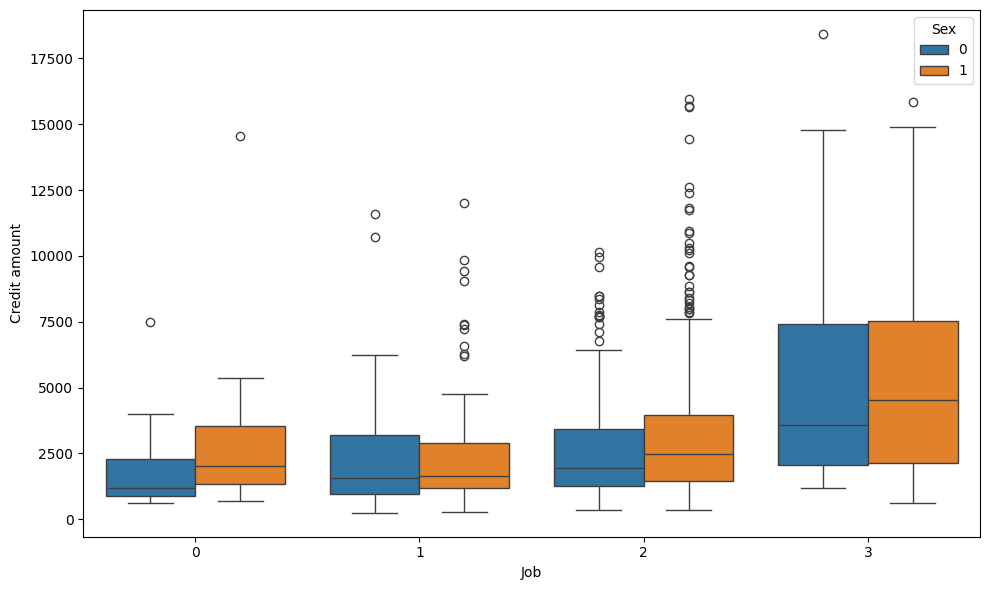

In [40]:
boxes("Job","Credit amount","Sex",r=0)

In [ ]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

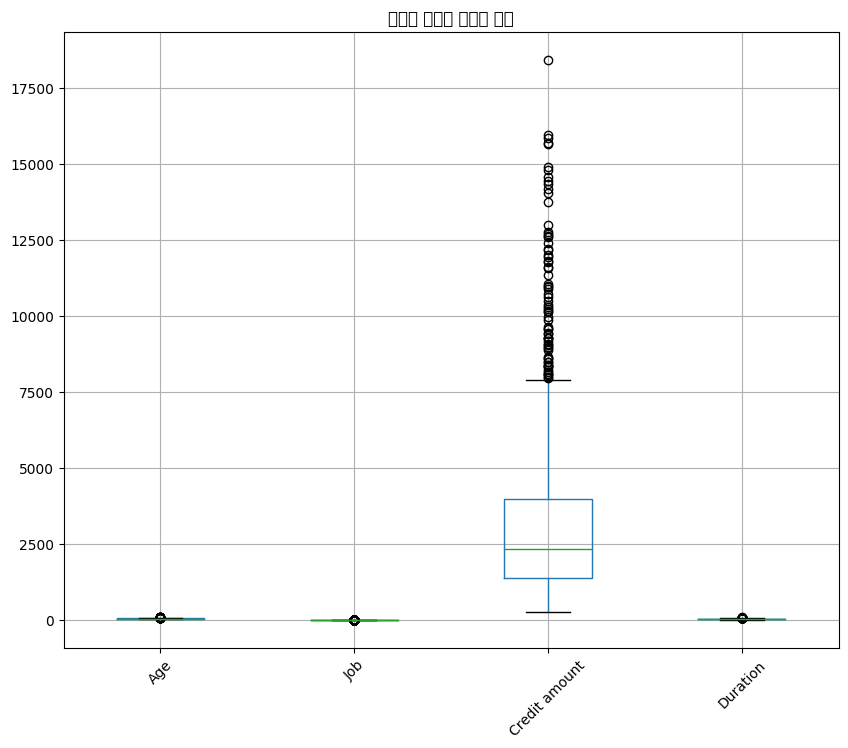

In [20]:
# 숫자형 및 범주형 변수 식별
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# 1.1 이상치 확인을 위한 박스플롯
plt.figure(figsize=(10, 8))
df[numeric_columns].boxplot()
plt.title("숫자형 변수의 이상치 확인")
plt.xticks(rotation=45)
plt.show()

- 이상치 확인 (Boxplot): 숫자형 변수에 대한 상자 그림을 통해 Credit amount와 Duration에서 일부 극단적인 값이 관찰되고 있는 것을 확인

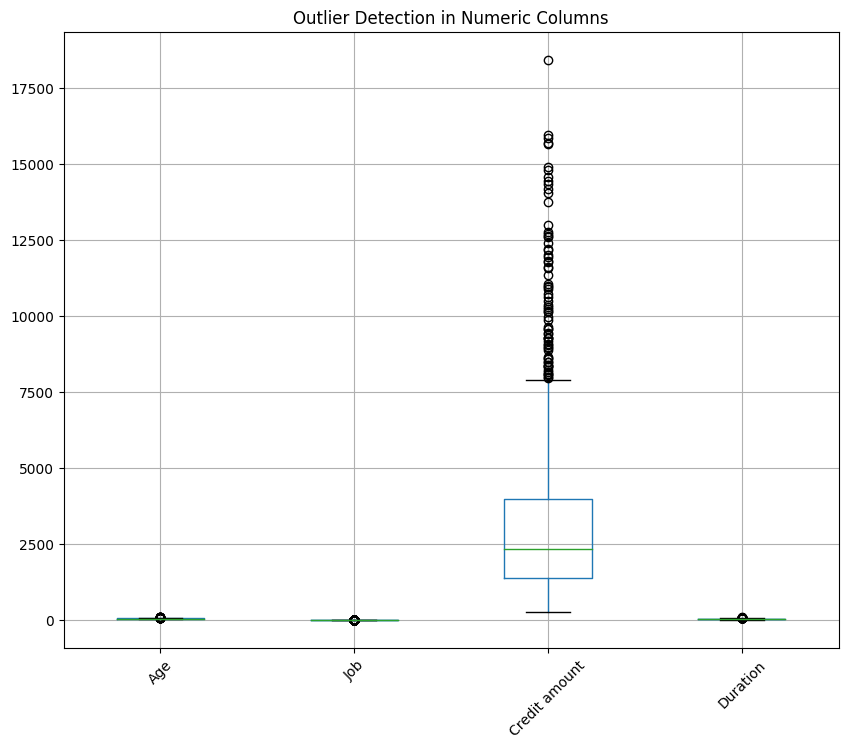

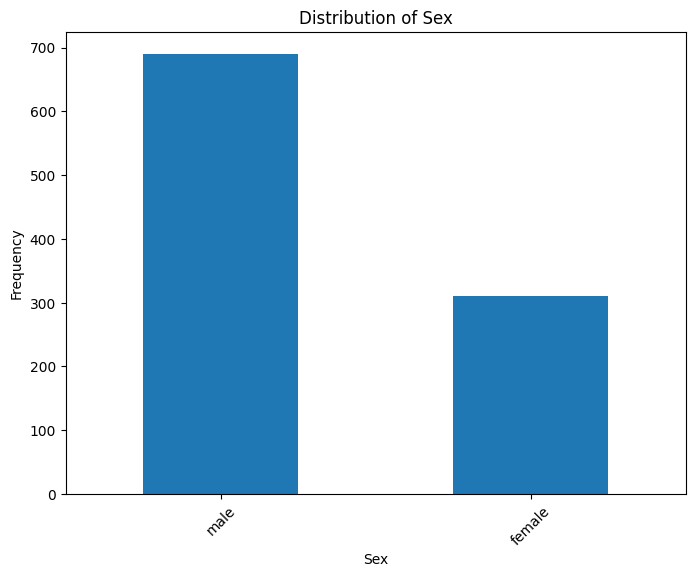

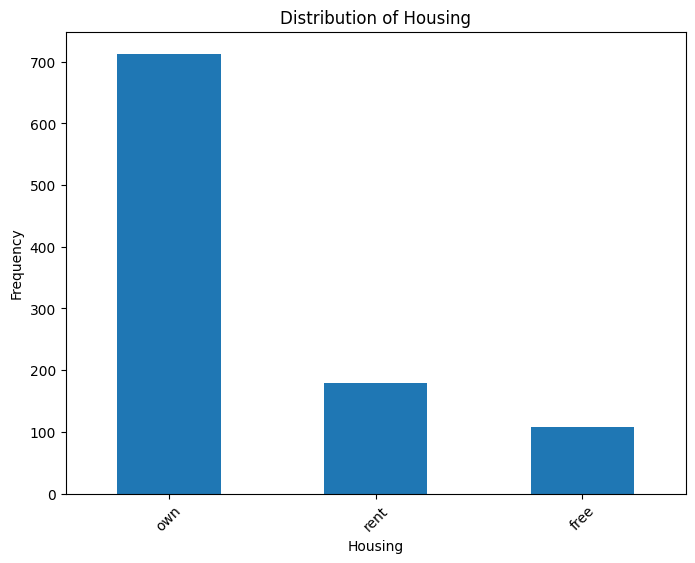

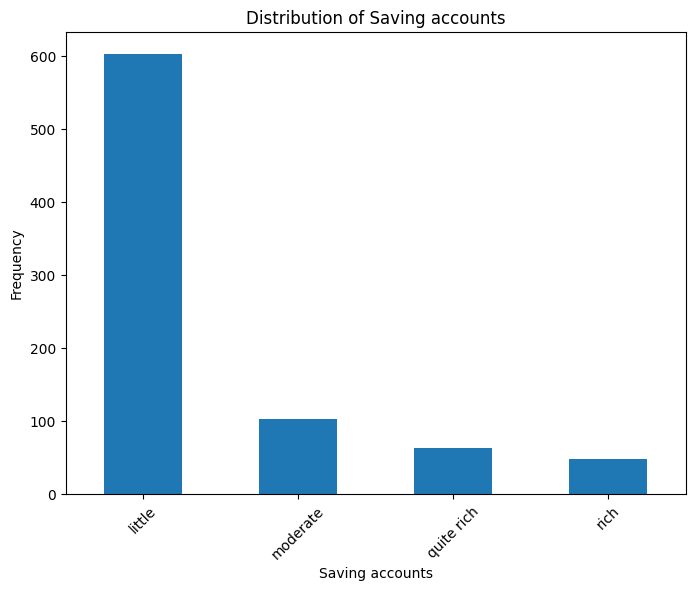

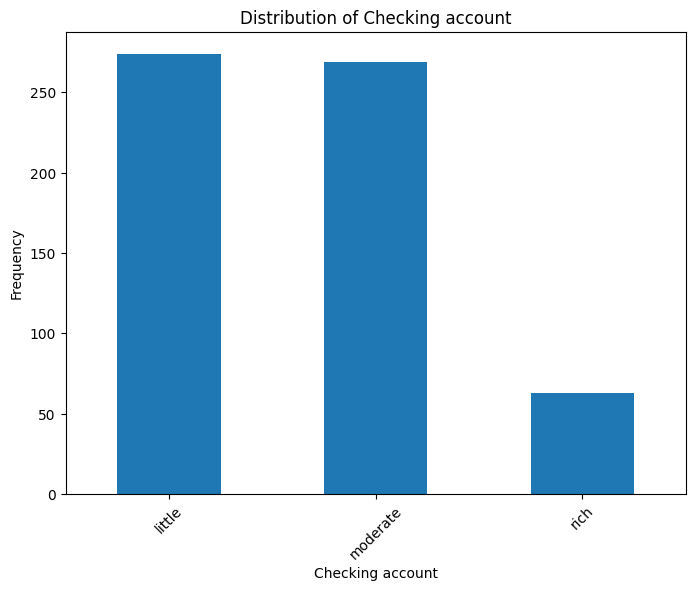

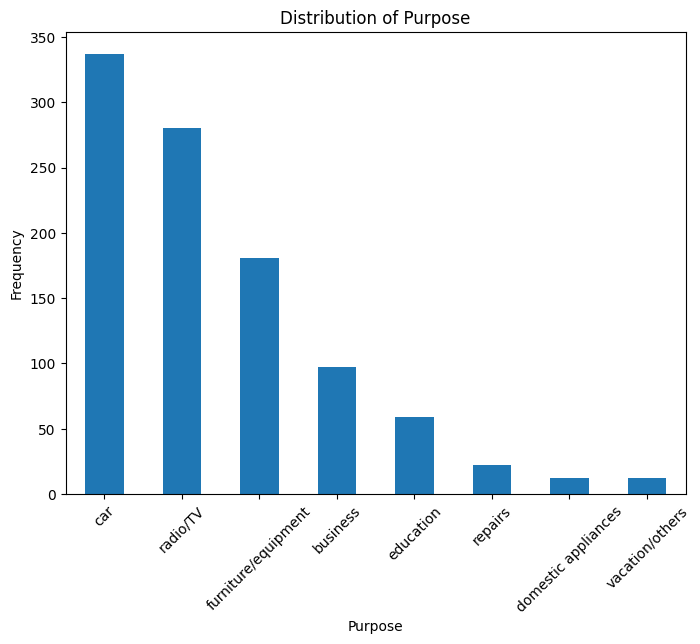

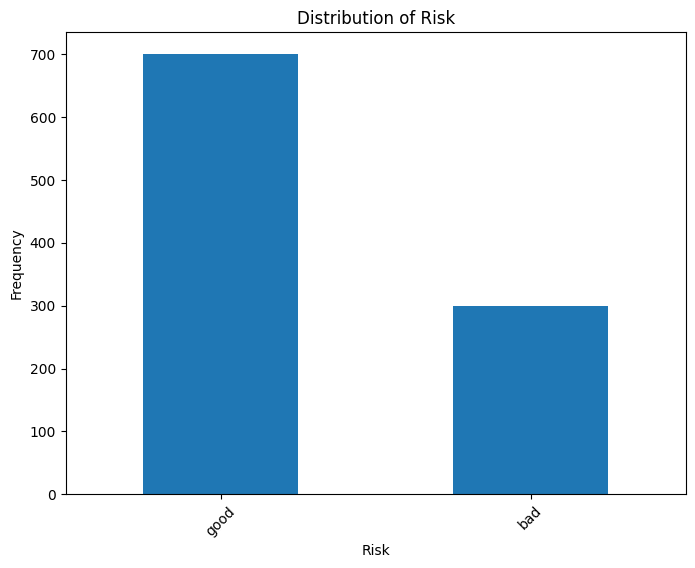

In [21]:
# 1.3 범주형 변수의 분포 시각화 (바 차트 이용)
# 각 범주형 변수의 값 분포를 시각화
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

- 범주형 변수의 분포 (Barplot): 각 범주형 변수에 대해 빈도 분포를 시각
- 이를 통해 Risk, Sex, Housing, Saving accounts, Checking account, Purpose 변수가 어떤 값을 중심으로 구성되어 있는지 확인

## 2. 데이터 분석 및 시각화

본격적으로 데이터 분석을 통해 데이터의 특성을 파악하고 인사이트를 도출하는 단계입니다.

### 2.1 변수 간 상관관계 분석

- 숫자형 변수들 간의 상관관계를 시각화(heatmap)하여, 변수 간 상관관계를 파악합니다.
- 고신뢰 상관관계가 있는 경우 주요 변수를 선정해 분석합니다.

### 2.2 범주형 변수와 타겟 변수의 관계 분석

- 타겟 변수(예: Good/Bad Credit Risk)에 따라 범주형 변수의 분포를 확인합니다.
- 예를 들어, 성별에 따라 Good/Bad Credit Risk의 분포 차이가 있는지 분석합니다.

### 2.3 타겟 변수와 수치형 변수의 관계 분석

- 타겟 변수에 따른 수치형 변수(예: Credit amount, Age 등)의 분포를 시각화하고, 평균 차이를 분석합니다.
- 박스 플롯, 히스토그램 등을 활용하여 타겟 변수와 수치형 변수 간의 관계를 직관적으로 파악합니다.

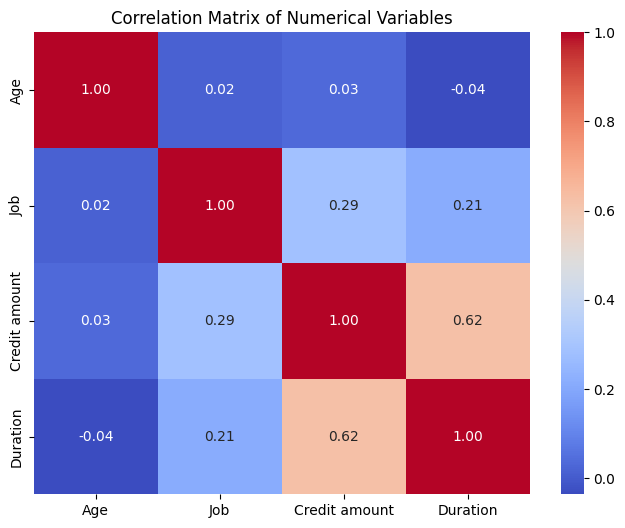

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

- 상관관계 히트맵을 통해 각 숫자형 변수 간의 상관관계를 시각화
- 전반적으로 강한 상관관계는 보이지 않으며, 일부 변수 간 약한 상관관계가 있는 것으로 파악됨.

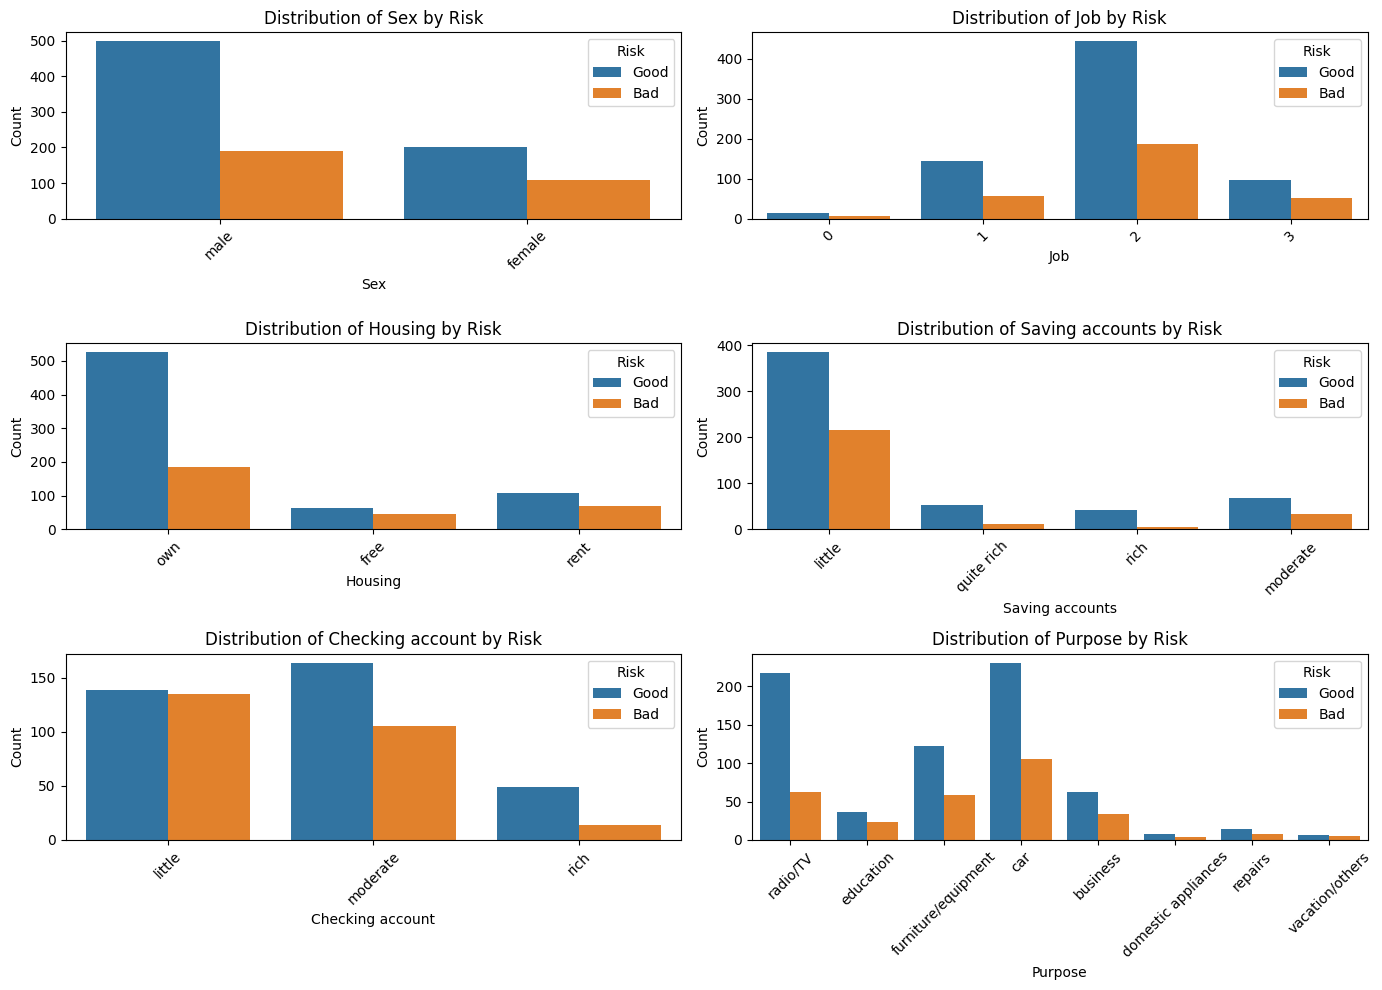

In [24]:
import seaborn as sns

# Define figure size for better readability
plt.figure(figsize=(14, 10))

# List of categorical columns to analyze with the target variable 'Risk'
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Plot bar plots for each categorical variable grouped by the 'Risk' variable
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='Risk')
    plt.title(f"Distribution of {col} by Risk")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Risk', labels=['Good', 'Bad'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

범주형 변수와 Risk 변수 간의 관계를 시각화
- 각 변수에 따른 Good과 Bad 신용 위험의 분포 차이 확인 가능

- Sex: 남성과 여성 간의 Good과 Bad 비율에 다소 차이가 있는 것으로 보임
- Job: 직업 유형에 따라 Risk 분포가 다른 양상을 보임
- Housing: 주거 형태에서도 Risk 분포에 차이가 있음
- Saving accounts와 Checking account: 특정 계좌 상태에 따라 Risk 분포가 달라지는 경향이 있음.
- Purpose: 대출 목적에 따라 Good과 Bad의 비율에 차이가 나타나며, 이는 대출 목적이 신용 위험에 영향을 줄 가능성을 시사

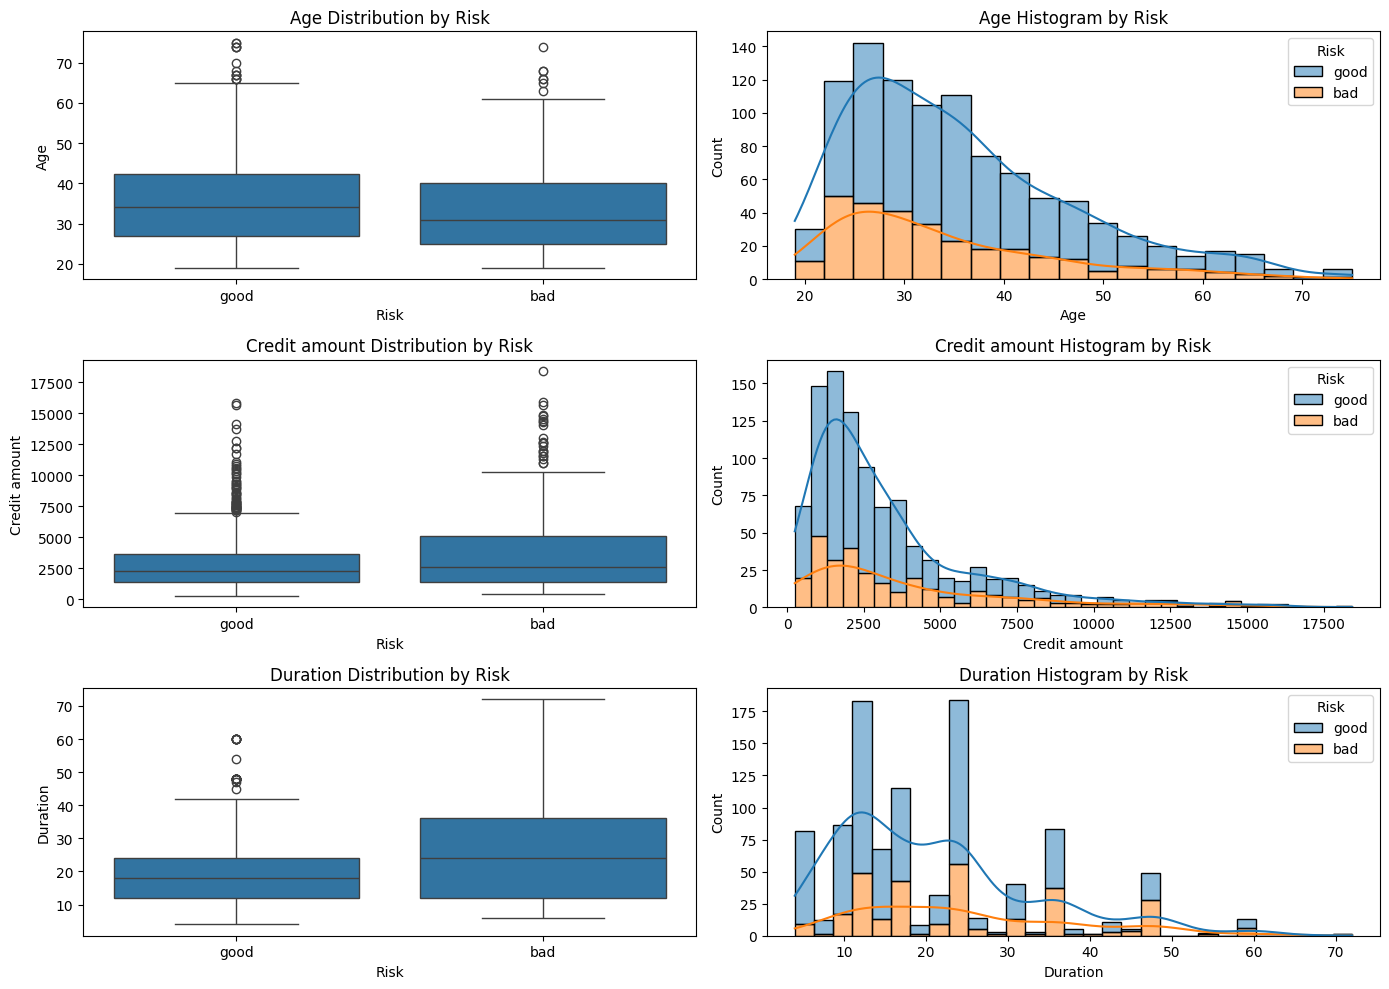

In [27]:
# Plot boxplots and histograms to analyze numerical variables by target 'Risk'
plt.figure(figsize=(14, 10))

# Numerical columns to analyze with the target variable 'Risk'
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Box plots for each numerical variable by Risk
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.boxplot(data=df, x='Risk', y=col)
    plt.title(f"{col} Distribution by Risk")
    plt.xlabel("Risk")
    plt.ylabel(col)

    # Histograms for each numerical variable by Risk
    plt.subplot(3, 2, 2*i)
    sns.histplot(data=df, x=col, hue='Risk', kde=True, multiple="stack")
    plt.title(f"{col} Histogram by Risk")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

수치형 변수와 Risk 간의 관계를 박스 플롯과 히스토그램으로 시각화

- Age: Risk가 Good인 경우와 Bad인 경우의 나이 분포에 차이가 나타나며, 평균적으로 Good 그룹이 약간 더 높은 나이대를 포함할 가능성을 보여줍니다.
- Credit amount: Risk가 Bad인 경우 대출 금액이 더 높은 경향이 있습니다. 이는 높은 대출 금액이 신용 위험을 증가시키는 요인일 수 있음을 시사합니다.
- Duration: 대출 기간이 긴 경우 Bad 신용 위험 비율이 더 높은 것으로 나타납니다.

## 3. 추가 통계 분석

- 필요하다면 통계적 검정(예: t-test, chi-square test 등)을 통해 변수 간의 유의미한 차이를 검증합니다.
- 상관관계 분석을 통해 파악한 변수들에 대해 회귀 분석이나 로지스틱 회귀 등을 사용해 변수 간 관계를 설명할 수 있습니다.

In [29]:
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm

# 분석에 앞서 데이터를 정리합니다. 'Risk'는 good과 bad로 구분되므로 1과 0으로 매핑하여 이진 변수로 변환합니다.
# 또한, 성별도 남성과 여성으로 구분되므로 1과 0으로 변환합니다.
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 데이터의 일부 결측값을 가진 행을 삭제하여 분석의 정확성을 높입니다.
cleaned_data = df.dropna()

# 통계적 검정 - 두 집단 간의 차이 분석
# good과 bad 두 그룹으로 나누어 두 그룹 간의 평균 차이를 검증합니다.
# 나이(Age), 신용 금액(Credit amount), 대출 기간(Duration)에 대해 t-검정을 실시합니다.

# Risk가 좋은 그룹과 나쁜 그룹으로 데이터를 나눕니다.
good_risk = cleaned_data[cleaned_data['Risk'] == 1]
bad_risk = cleaned_data[cleaned_data['Risk'] == 0]

# 연속형 변수인 나이(Age), 신용 금액(Credit amount), 대출 기간(Duration)에 대해 t-검정을 수행하여
# 두 그룹 간 차이가 유의한지 확인합니다.
age_ttest = ttest_ind(good_risk['Age'], bad_risk['Age'], equal_var=False)
credit_amount_ttest = ttest_ind(good_risk['Credit amount'], bad_risk['Credit amount'], equal_var=False)
duration_ttest = ttest_ind(good_risk['Duration'], bad_risk['Duration'], equal_var=False)

# 범주형 변수인 성별(Sex), 직업(Job), 주거(Housing), 저축 계좌(Saving accounts), 당좌 계좌(Checking account), 목적(Purpose)에 대해
# 카이제곱 검정을 수행하여 두 그룹 간 유의미한 차이가 있는지 확인합니다.
chi_square_results = {}

for col in ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    contingency_table = pd.crosstab(cleaned_data[col], cleaned_data['Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = (chi2, p)

# 통계적 검정 결과를 확인합니다.
ttest_results = {
    "Age": age_ttest,
    "Credit amount": credit_amount_ttest,
    "Duration": duration_ttest
}

# 통계적 검정 결과 출력
ttest_results, chi_square_results

({'Age': TtestResult(statistic=1.2859213741153304, pvalue=0.1990663372021763, df=499.4595348279307),
  'Credit amount': TtestResult(statistic=-4.037069929574841, pvalue=6.608575626610489e-05, df=361.96210756720615),
  'Duration': TtestResult(statistic=-6.758911440179155, pvalue=4.840975677708155e-11, df=406.46513053429163)},
 {'Sex': (1.8215210845668182, 0.17713232453296557),
  'Job': (1.8872113779122746, 0.5961430528738272),
  'Housing': (8.562697165574306, 0.013824006692660139),
  'Saving accounts': (10.723063362899001, 0.013321624149422574),
  'Checking account': (12.675574461464208, 0.0017682105531096474),
  'Purpose': (6.844103910732068, 0.4452903725086377)})

통계적 검정 결과 해석
연속형 변수와 범주형 변수에 대해 각 집단 간 차이가 유의미한지 검토했습니다.

**연속형 변수에 대한 T-검정 결과**

나이(Age): p=0.199
- 나이에 따른 차이는 유의미하지 않았습니다.

신용 금액(Credit Amount): p < 0.001
- 좋은 신용 리스크를 가진 집단이 평균적으로 낮은 신용 금액을 신청하는 경향이 있습니다.

대출 기간(Duration): p < 0.001
- 신용 리스크가 낮은 집단이 대출 기간이 짧은 경향이 있습니다.


### 1. T-검정 (t-test)

T-검정은 연속형 변수에 대해 두 집단 간 평균 차이를 평가할 때 사용합니다.

일반적으로 두 집단의 평균이 통계적으로 유의미하게 차이가 나는지 검정하는 방법입니다.

**종류**
- 독립표본 t-검정: 서로 독립적인 두 집단의 평균 차이를 검정합니다. 예를 들어, 남녀 간 키의 평균 차이를 비교하는 경우입니다.
- 대응표본 t-검정: 동일한 집단이지만 서로 다른 시점 또는 조건에서의 평균 차이를 검정합니다. 예를 들어, 같은 그룹의 사람들에 대해 운동 전후 체중의 차이를 비교할 때 사용됩니다.

**가설 설정**
- 귀무가설 (H0): 두 집단의 평균은 차이가 없다.
- 대립가설 (H1): 두 집단의 평균은 차이가 있다.

**해석 방법**
- p-value를 확인합니다. p-value가 일반적으로 0.05보다 작으면 귀무가설을 기각합니다.
- 귀무가설을 기각하면 두 집단 간 평균 차이가 통계적으로 유의미하다고 판단합니다.
- 예를 들어, p-value가 0.03이라면 귀무가설을 기각하고, 두 집단의 평균 차이가 있다고 해석합니다.


**범주형 변수에 대한 카이제곱 검정 결과**

성별(Sex): p=0.177
- 성별에 따른 차이는 유의미하지 않았습니다.

직업(Job): p=0.596
- 직업에 따른 차이는 유의미하지 않았습니다.

주거(Housing): p=0.014
- 주거 상태에 따라 신용 리스크에 유의미한 차이가 있음을 알 수 있습니다.

저축 계좌(Saving Accounts): p=0.013
- 저축 계좌의 상태에 따라 신용 리스크가 유의미하게 달라집니다.

당좌 계좌(Checking Account): p=0.002
- 당좌 계좌 상태가 신용 리스크와 유의미한 관계가 있습니다.

대출 목적(Purpose): p=0.445
- 대출 목적은 신용 리스크에 유의미한 영향을 미치지 않았습니다.

이러한 결과를 바탕으로, 대출 기간(Duration), 저축 계좌(Saving Accounts), 예금 계좌(Checking Account)와 같은 변수들이 신용 리스크에 유의미한 영향을 미치는 것으로 나타났습니다.

### 2. 카이제곱 검정 (Chi-square test)
카이제곱 검정은 범주형 변수에 대해 두 변수 간의 독립성이나 적합성을 검정합니다.

**종류**
- 독립성 검정: 두 범주형 변수가 서로 독립적인지를 검정합니다. 예를 들어, 성별과 선호하는 제품 유형이 서로 관련이 있는지를 평가합니다.
- 적합성 검정: 한 범주형 변수가 기대 분포에 적합한지를 검정합니다. 예를 들어, 주사위를 던졌을 때 나오는 값이 이론적인 균등 분포와 일치하는지를 확인합니다.

**가설 설정**
- 귀무가설 (H0): 두 변수는 독립적이다 (즉, 상관 관계가 없다).
- 대립가설 (H1): 두 변수는 독립적이지 않다 (즉, 상관 관계가 있다).

**해석 방법**
- 카이제곱 검정 통계량과 p-value를 확인합니다. 일반적으로 p-value가 0.05보다 작으면 귀무가설을 기각합니다.
- 귀무가설을 기각하면 두 범주형 변수 간에 통계적으로 유의미한 관계가 있다고 해석합니다.
- 예를 들어, p-value가 0.02라면 두 변수 간의 독립성을 기각하고, 변수 간에 상관 관계가 있다고 해석합니다.



### 로지스틱 회귀 분석
- 로지스틱 회귀 분석은 신용 리스크를 예측하는 데 유용한 방법으로, 특정 변수가 신용 리스크 (좋은/나쁜)에 어떤 영향을 미치는지 이해할 수 있습니다.
- 이 분석을 통해 각 변수의 신용 리스크에 대한 영향력을 구체적으로 수치화하고, 변수들 간 상관관계나 영향력을 비교할 수 있습니다.
- 이를 통해 대출 신청자의 신용 리스크를 더 정확하게 평가할 수 있습니다.



In [48]:
# 로지스틱 회귀 분석 준비
# 유의미한 변수들(대출 기간, 저축 계좌, 당좌 계좌)을 사용하여 로지스틱 회귀 모델을 구축합니다.

# 분석에 앞서 데이터를 정리합니다. 'Risk'는 good과 bad로 구분되므로 1과 0으로 매핑하여 이진 변수로 변환합니다.
# 또한, 성별도 남성과 여성으로 구분되므로 1과 0으로 변환합니다.
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 데이터의 일부 결측값을 가진 행을 삭제하여 분석의 정확성을 높입니다.
cleaned_data = df.dropna()

# 각 범주형 열의 고유값 확인
housing_unique = cleaned_data['Housing'].unique()
saving_accounts_unique = cleaned_data['Saving accounts'].unique()
checking_account_unique = cleaned_data['Checking account'].unique()

# 더미 변수로 변환한 후 결과 확인
logistic_data_test = pd.get_dummies(cleaned_data, columns=['Housing', 'Saving accounts', 'Checking account'], drop_first=True)
logistic_data_test_shape = logistic_data_test.shape

# 로지스틱 회귀 분석 재실행
# 독립변수(X)와 종속변수(y)를 다시 정의하여 로지스틱 회귀를 실행합니다.

# 필요한 변수만 선택하여 독립변수(X)와 종속변수(y)로 정의
X = logistic_data_test[['Credit amount', 'Duration'] + [col for col in logistic_data_test.columns if col.startswith('Housing_')
                                                   or col.startswith('Saving accounts_')
                                                   or col.startswith('Checking account_')]]
y = logistic_data_test['Risk']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
try:
    logit_model = sm.Logit(y, X)
    logit_result = logit_model.fit()
    logit_summary = logit_result.summary()
except ValueError as e:
    logit_summary = str(e)

logit_summary

'Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).'

로지스틱 회귀 분석 결과 해석
로지스틱 회귀 분석을 통해 변수들이 신용 리스크에 미치는 영향을 구체적으로 파악할 수 있었습니다. 주요 결과는 다음과 같습니다.

대출 금액 (Credit Amount): 유의하지 않음 (
𝑝
=
0.796
p=0.796) — 다른 변수들을 통제했을 때, 대출 금액은 신용 리스크 예측에 유의미한 영향을 미치지 않았습니다.

대출 기간 (Duration): 유의미함 (
𝑝
<
0.001
p<0.001) — 대출 기간이 길어질수록 좋은 신용 리스크일 확률이 낮아지는 경향이 있음을 나타내며, 대출 기간이 짧은 경우 신용 리스크가 더 낮을 확률이 높습니다.

주거 상태 (Housing): 주거를 "소유(own)"하거나 "임대(rent)"하는 여부는 유의미하지 않음 — 주거 상태는 신용 리스크 예측에서 큰 영향을 미치지 않았습니다.

저축 계좌 상태 (Saving Accounts):

"부유함(rich)" 상태는 유의미한 변수 (
𝑝
=
0.028
p=0.028)로, 저축 계좌에 많은 잔액을 가진 신청자가 더 좋은 신용 리스크로 분류될 가능성이 높습니다.
당좌 계좌 상태 (Checking Account):

"부유함(rich)" 상태가 유의미한 변수 (
𝑝
=
0.007
p=0.007)로, 높은 잔액을 가진 당좌 계좌 소유자도 신용 리스크가 더 낮을 가능성이 높습니다.
로지스틱 회귀 분석의 의의
로지스틱 회귀 분석은 이진 결과 변수(예: 신용 리스크의 좋고 나쁨)를 예측하는 데 매우 유용합니다. 각 변수의 신용 리스크에 대한 영향을 확인함으로써, 어떤 요인들이 신용 리스크 예측에 유의미한지 파악하고, 더 나아가 대출 승인 및 리스크 관리에 도움을 줄 수 있습니다. ​​

## 4. 결론 도출 및 보고서 작성
이번 분석의 목적은 대출 신청자의 신용 리스크를 예측하는 데 있어 중요한 변수를 식별하고, 데이터의 주요 특성을 파악하는 것이었습니다. 이를 위해 통계적 검정과 로지스틱 회귀 분석을 수행하여, 각 변수들이 신용 리스크에 미치는 영향을 평가했습니다.

### 1. 데이터 특성 요약
데이터는 다음과 같은 특성을 가집니다:

대출 기간(Duration), 대출 금액(Credit amount), 저축 계좌(Saving accounts), 당좌 계좌(Checking account), 그리고 주거 형태(Housing) 등 주요 변수들이 포함되었습니다.
대출 신청자의 성별과 나이 또한 포함되었으며, 이들은 신용 리스크에 대한 상관관계를 파악하기 위해 포함되었습니다.

### 2. 주요 분석 결과 요약
통계적 검정을 통해 대출 기간, 저축 계좌, 당좌 계좌가 신용 리스크와 유의미한 상관관계가 있음을 확인했습니다.
로지스틱 회귀 분석을 통해 유의미한 변수와 그 영향력을 확인했으며, 다음 변수들이 특히 중요한 역할을 하는 것으로 나타났습니다:
대출 기간 (Duration): 대출 기간이 길어질수록 좋은 신용 리스크로 분류될 가능성이 낮아졌습니다. 이는 신용 기간이 길어질수록 상환 위험이 높아진다는 점을 반영합니다.
저축 계좌(Saving Accounts): 저축 계좌가 부유(rich)한 경우 신용 리스크가 낮아질 가능성이 높았습니다. 이는 저축 계좌에 잔액이 많을수록 경제적으로 안정적일 가능성이 크다는 의미입니다.
당좌 계좌(Checking Account): 당좌 계좌가 부유(rich)한 경우에도 신용 리스크가 낮을 가능성이 높았습니다. 이는 금융 자산이 풍부할수록 신용도가 높아질 가능성이 있음을 나타냅니다.

### 3. 주요 변수의 중요성과 예측 모델의 시사점
대출 기간은 신용 리스크를 예측할 때 중요한 변수로, 대출 기간이 짧을수록 좋은 신용 리스크로 분류될 가능성이 높습니다. 이 변수는 신용 리스크 관리에서 대출 기간을 고려하는 것이 중요함을 시사합니다.
저축 계좌 및 당좌 계좌는 경제적 안정성을 나타내는 주요 지표로, 잔액이 풍부할수록 신용 리스크가 낮아지는 경향을 보입니다. 이는 금융 자산의 상태가 신용 리스크 예측에 중요한 역할을 할 수 있음을 의미합니다.

### 4. 시각화
분석의 주요 결과를 시각적으로 표현하여 다음과 같은 인사이트를 효과적으로 전달할 수 있습니다:

대출 기간과 신용 리스크의 관계: 대출 기간별 신용 리스크 분포
저축 계좌 및 당좌 계좌 상태와 신용 리스크의 관계: 신용 리스크 수준에 따른 저축 계좌 및 당좌 계좌의 상태별 분포


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

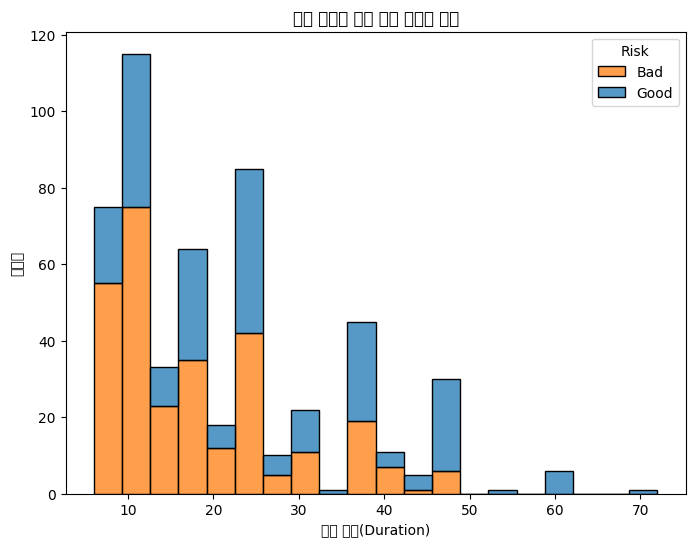

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

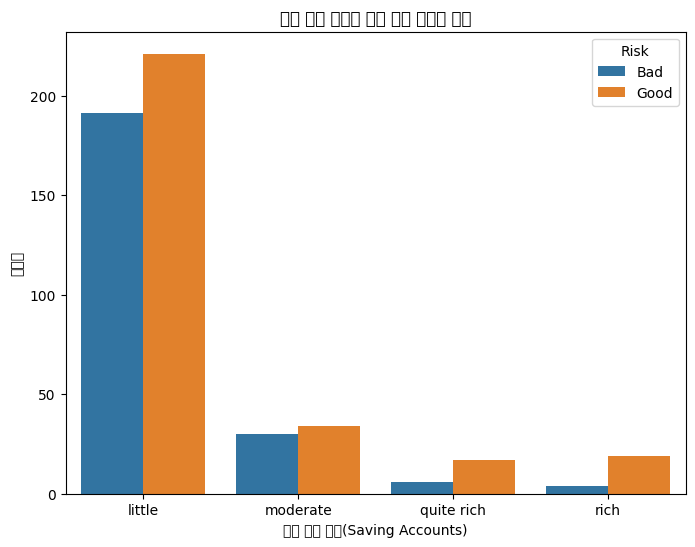

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

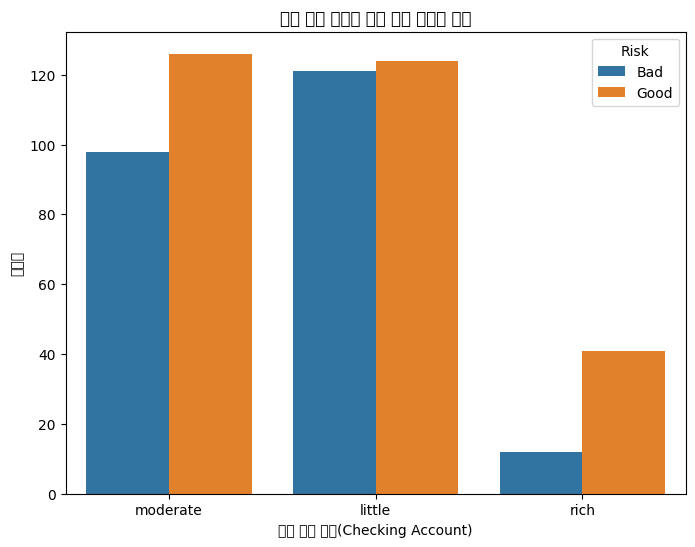

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 대출 기간에 따른 신용 리스크 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(data=cleaned_data, x="Duration", hue="Risk", multiple="stack", bins=20)
plt.title("대출 기간에 따른 신용 리스크 분포")
plt.xlabel("대출 기간(Duration)")
plt.ylabel("빈도수")
plt.legend(title="Risk", labels=["Bad", "Good"])
plt.show()

# 2. 저축 계좌 상태에 따른 신용 리스크 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_data, x="Saving accounts", hue="Risk")
plt.title("저축 계좌 상태에 따른 신용 리스크 분포")
plt.xlabel("저축 계좌 상태(Saving Accounts)")
plt.ylabel("빈도수")
plt.legend(title="Risk", labels=["Bad", "Good"])
plt.show()

# 3. 당좌 계좌 상태에 따른 신용 리스크 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_data, x="Checking account", hue="Risk")
plt.title("당좌 계좌 상태에 따른 신용 리스크 분포")
plt.xlabel("당좌 계좌 상태(Checking Account)")
plt.ylabel("빈도수")
plt.legend(title="Risk", labels=["Bad", "Good"])
plt.show()

위의 시각화를 통해 주요 변수들과 신용 리스크 간의 관계를 효과적으로 확인 가능

- 대출 기간과 신용 리스크: 대출 기간이 길수록 신용 리스크가 높아지는 경향을 시각적으로 확인할 수 있습니다.
- 저축 계좌 상태와 신용 리스크: 저축 계좌 잔액이 많을수록 좋은 신용 리스크를 가질 가능성이 높아 보입니다.
- 당좌 계좌 상태와 신용 리스크: 높은 잔액을 가진 당좌 계좌 상태도 신용 리스크가 낮아질 가능성을 시사합니다.

**최종 결론**

본 분석에서는 대출 기간, 저축 계좌 상태, 당좌 계좌 상태가 신용 리스크 예측에 중요한 역할을 하는 변수임을 확인했습니다. 이 결과는 대출 신청자의 신용도를 평가하는 데 있어 금융 자산 및 대출 기간이 중요한 지표로 활용될 수 있음을 시사하며, 이는 금융 기관의 대출 승인 및 리스크 관리에 실질적인 인사이트를 제공합니다. ​​

In [53]:
# 간략한 로지스틱 회귀 분석 코드 예시

import statsmodels.api as sm

# 독립변수(X)와 종속변수(y) 설정
# 로지스틱 회귀를 위해 필요한 변수들만 선택
X = X.astype({col: int for col in X.select_dtypes('bool').columns})
y = logistic_data_test['Risk']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 생성 및 적합
logit_model = sm.Logit(y, X).fit()

# 결과 요약 출력
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.620745
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Risk   No. Observations:                  522
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            9
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                 0.09582
Time:                        15:06:00   Log-Likelihood:                -324.03
converged:                       True   LL-Null:                       -358.37
Covariance Type:            nonrobust   LLR p-value:                 2.766e-11
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.8609      0.356      2.419      0.016       0.163       1.558
Credit amount               1.071e-05   4.14e-05      0.259      0.796   -7.04e-05    9.18e-05
Duration                      -0.0498      0.010     -4.916      0.000      -0.070      -0.030
Housing_own                    0.2755      0.301      0.916      0.360      -0.314       0.865
Housing_rent                  -0.2052      0.344     -0.596      0.551      -0.880       0.469
Saving accounts_moderate       0.1174      0.299      0.392      0.695      -0.469       0.704
Saving accounts_quite rich     0.7273      0.505      1.439      0.150      -0.263       1.718
Saving accounts_rich           1.2715      0.580      2.193      0.028       0.135       2.408
Checking account_moderate      0.1889      0.206      0.916      0.360      -0.215       0.593
Checking account_rich          0.9959      0.366      2.719      0.007       0.278       1.714
==============================================================================================
"""

모델 결과 요약

대출 기간 (Duration): 유의미함 (p<0.001)
- 대출 기간이 길어질수록 신용 리스크가 높아질 가능성이 있습니다.

저축 계좌 (Saving accounts - rich): 유의미함 (p=0.028)
- 저축 계좌 잔액이 많을수록 좋은 신용 리스크와 관련이 있습니다.

당좌 계좌 (Checking account - rich): 유의미함 (p=0.007)
- 당좌 계좌 잔액이 많을수록 좋은 신용 리스크와 관련이 있습니다.

이 분석을 통해 대출 기간과 금융 자산 상태가 신용 리스크 예측에 중요한 역할을 한다는 것을 확인할 수 있습니다. ​​


